In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Umesh Sharma\Downloads\unemployment_rate_by_age_groups.csv")

In [3]:
df

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048
...,...,...,...,...,...,...,...,...,...,...,...,...
189,State,California,11/1/2023,2023,November,0.159,0.080,0.052,0.039,0.028,0.033,0.039
190,State,California,12/1/2023,2023,December,0.168,0.079,0.053,0.039,0.029,0.034,0.037
191,State,California,1/1/2024,2024,January,0.169,0.079,0.053,0.040,0.032,0.035,0.039
192,State,California,2/1/2024,2024,February,0.175,0.081,0.052,0.040,0.033,0.035,0.040


In [4]:
df.describe()

,Year,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2015.670103,0.231201,0.120237,0.075892,0.060727,0.058093,0.058887,0.061804
std,4.684273,0.078050,0.039872,0.026660,0.024138,0.024083,0.022614,0.023262
min,2008.000000,0.113000,0.069000,0.040000,0.028000,0.028000,0.030000,0.026000
25%,2012.000000,0.164750,0.081000,0.051000,0.040000,0.035000,0.038000,0.041250
50%,2016.000000,0.212500,0.113500,0.071000,0.053000,0.052500,0.054000,0.054500
75%,2020.000000,0.309000,0.155750,0.101000,0.081000,0.077000,0.081000,0.085000
max,2024.000000,0.361000,0.195000,0.120000,0.107000,0.106000,0.098000,0.111000


# Data Preprocessing:


In [5]:
df.isnull().sum()

Area Type    0
Area Name    0
Date         0
Year         0
Month        0
Age 16-19    0
Age 20-24    0
Age 25-34    0
Age 35-44    0
Age 45-54    0
Age 55-64    0
Age 65+      0
dtype: int64

<Axes: >

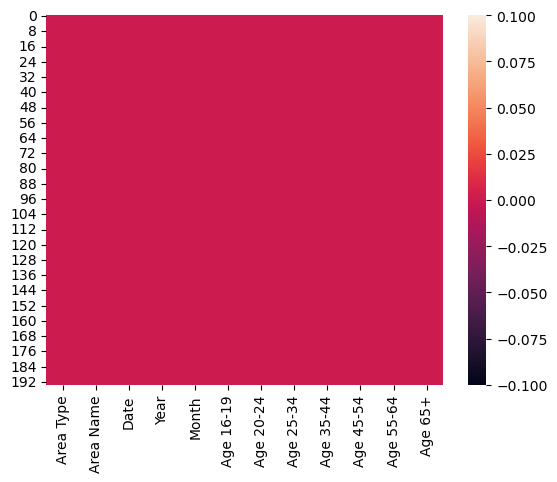

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.drop(["Area Type"],inplace=True,axis=1)

In [8]:
df.head()

,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [9]:
numeric_cols = df.iloc[:, 4:]


In [10]:
Q1=numeric_cols.quantile(0.25)
Q3=numeric_cols.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
print(outliers)

     Age 16-19  Age 20-24  Age 25-34  Age 35-44  Age 45-54  Age 55-64  Age 65+
0        False      False      False      False      False      False    False
1        False      False      False      False      False      False    False
2        False      False      False      False      False      False    False
3        False      False      False      False      False      False    False
4        False      False      False      False      False      False    False
..         ...        ...        ...        ...        ...        ...      ...
189      False      False      False      False      False      False    False
190      False      False      False      False      False      False    False
191      False      False      False      False      False      False    False
192      False      False      False      False      False      False    False
193      False      False      False      False      False      False    False

[194 rows x 7 columns]


In [11]:
if outliers.any().any():
    print("Outliers exist in the DataFrame.")
else:
    print("No outliers found in the DataFrame.")

No outliers found in the DataFrame.


# Exploratory Data Analysis (EDA):


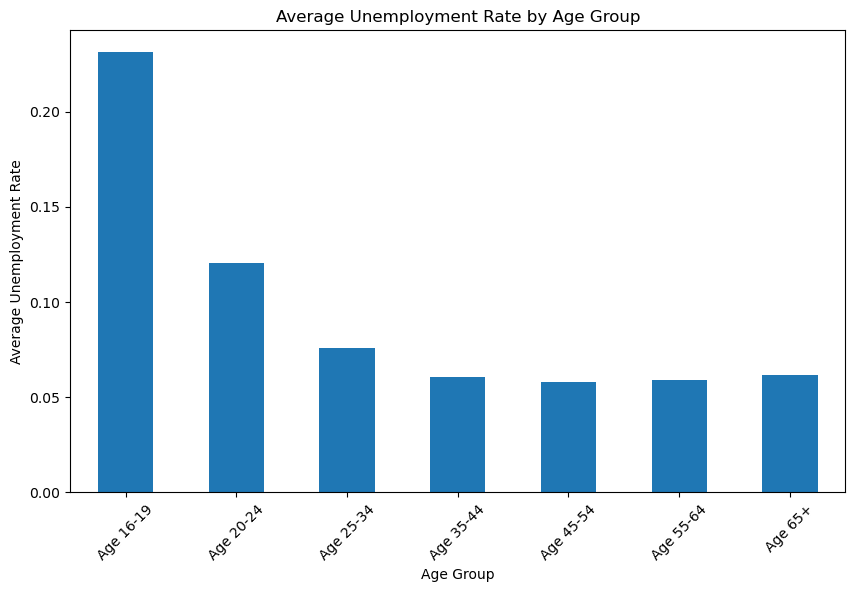

In [12]:
avg_unemployment = df.iloc[:, 4:].mean()
avg_unemployment.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

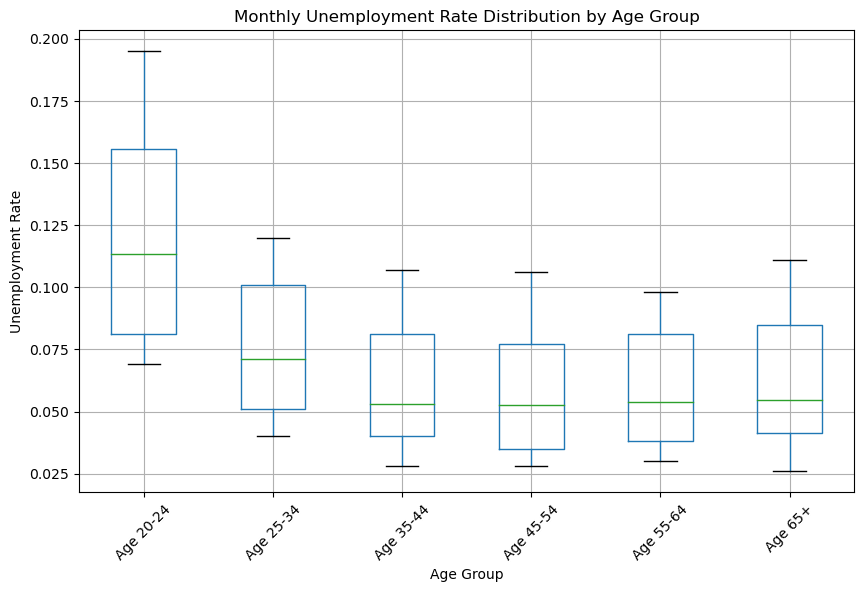

In [13]:
# Monthly Unemployment Rate Distribution
df.iloc[:, 5:].boxplot(figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Rate Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()


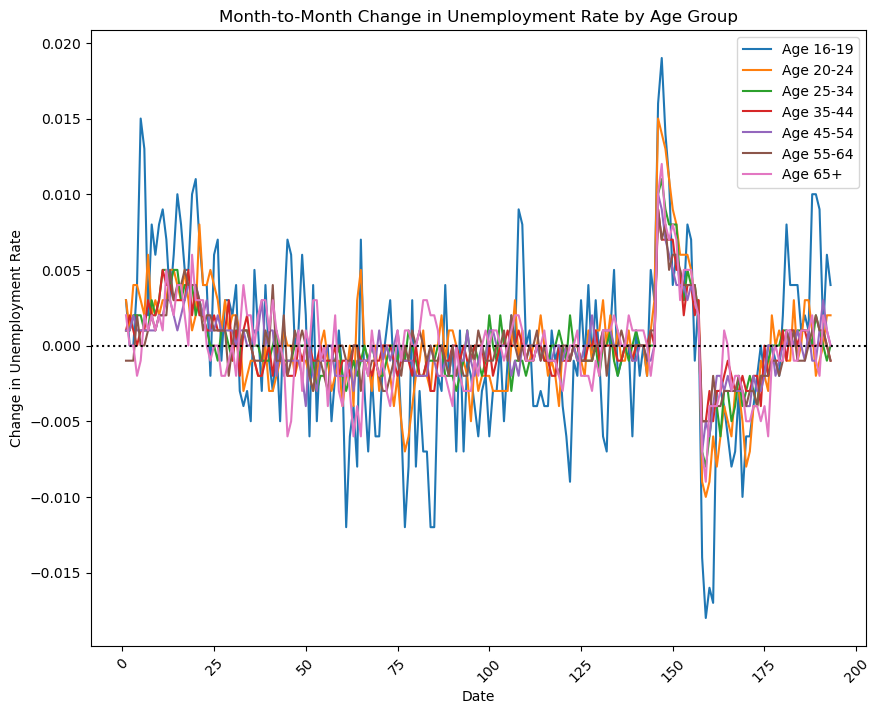

In [14]:
# Age Group Unemployment Rate Change
unemployment_change = df.iloc[:, 4:].diff()
unemployment_change.plot(figsize=(10, 8))
plt.xlabel('Date')
plt.ylabel('Change in Unemployment Rate')
plt.title('Month-to-Month Change in Unemployment Rate by Age Group')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle=':')
plt.show()

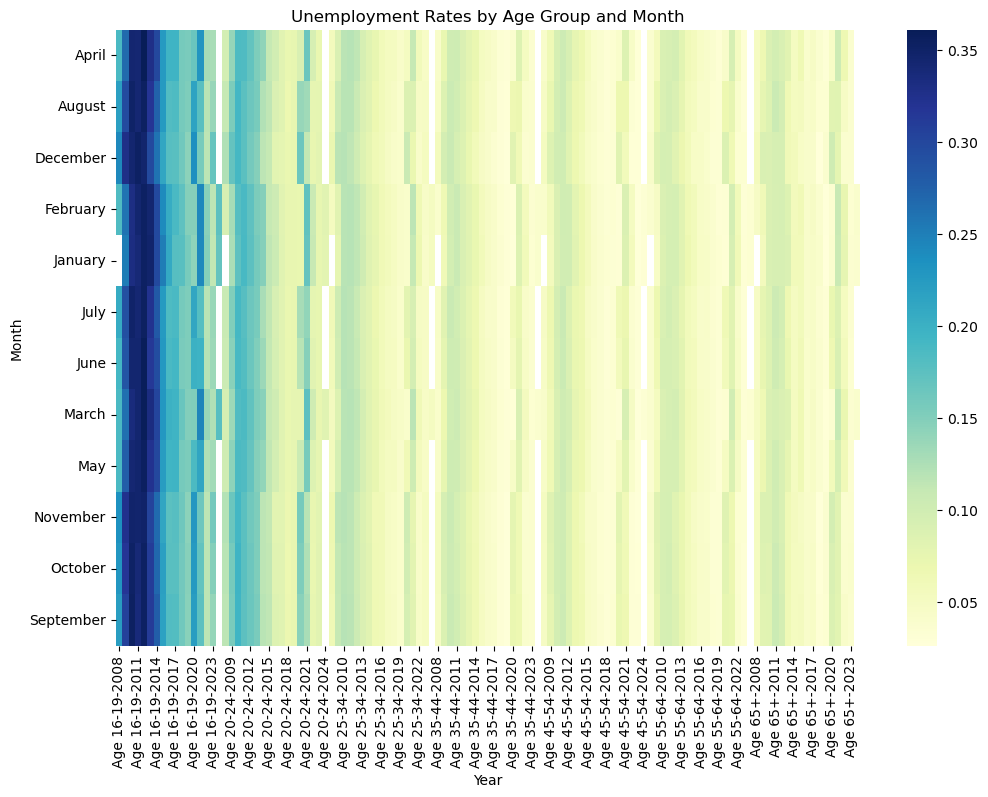

In [15]:
# Heatmap of Unemployment Rates by Age Group and Month
df_pivot = df.pivot_table(index='Month', columns='Year', values=df.columns[4:])
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='YlGnBu')
plt.title('Unemployment Rates by Age Group and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

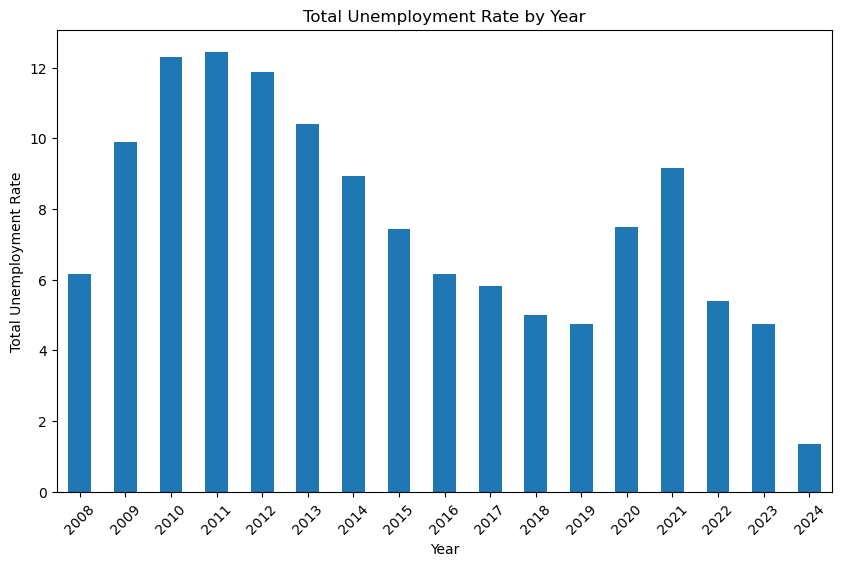

In [16]:
# Bar Plot of Total Unemployment Rate by Year
total_unemployment_yearly = df.groupby('Year')[df.columns[4:]].sum().sum(axis=1)
total_unemployment_yearly.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Unemployment Rate')
plt.title('Total Unemployment Rate by Year')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Total Unemployment Rate by AGE'}>

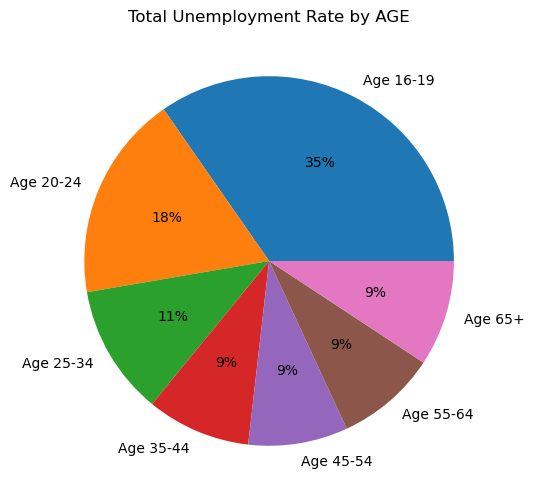

In [17]:
plt.figure(figsize=[6,6])
plt.title('Total Unemployment Rate by AGE')
avg_unemployment.plot(kind='pie', autopct='%1.f%%')


<Axes: title={'center': 'Total Unemployment Rate by AGE (20+)'}>

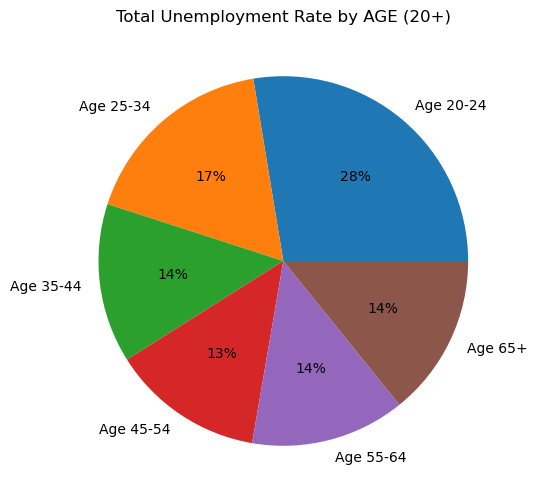

In [18]:
avg_unemployment1 = df.iloc[:, 5:].mean()
plt.figure(figsize=[6,6])
plt.title('Total Unemployment Rate by AGE (20+)')
avg_unemployment1.plot(kind='pie', autopct='%1.f%%')

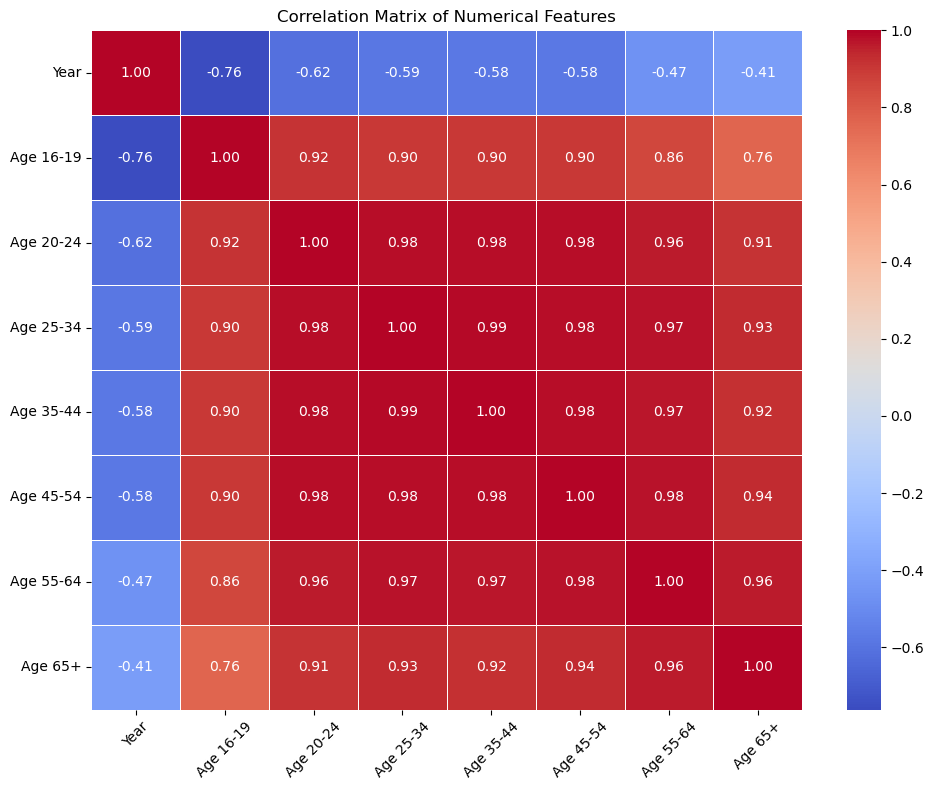

In [19]:
numerical_features = df.select_dtypes(include=['int', 'float'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()